<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 1
#### Student Name: Subbulakshmi Natarajan
#### Student ID: 34069178
#### Student Name: Bhavna Balakrishnan
#### Student ID: 33954437


Date: 30/08/2024


Environment: Python xxxx

Libraries used:
* re (for regular expression, installed and imported)
* pandas (for data manipulation)
* json: (for converting a file into JSON format)
* datatime:(for allowing for date and time)
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Task #1](#task) <br>
[1.1. Introduction](#Intro) <br>
[1.2. Importing Libraries](#libs) <br>
[1.3. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[1.3.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[1.3.2. Reading Files](#Read) <br>
$\;\;\;\;$[1.3.3. Whatever else](#latin) <br>
[1.4. Writing to CSV/JSON File](#write) <br>
[1.5. Final Output](#final) <br>
[1.6. Verification - using the sample files](#test_xml) <br>
[1.7. Summary](#summary) <br>
[1.8. References](#Ref) <br>

-------------------------------------

# 1. TASK -1

<div class="alert alert-block alert-warning">

## 1.1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This assessment is about extracting data from semi-structured text files. The datasets that were given to us were around 14 text files as well as 1 Excel file where the information about user views. As an assignment clearly mentioned the dataset is about the subset records of Google reviews. In the dataset, there are sets of attributes that are recorded in the Google map.
The attributes that are in the dataset are as follows
* user_id - ID of the reviewer
* name - name of the reviewer
* rating - rating of the business
* text - text of the review (unix time)
* pics - pictures of the review
* resp - business response to the review including unix time and text of the response
* gmap_id - ID of the business

The aim of task 1 is to use this dataset to extract and transform the data into meaningful CSV and JSON files using the input files that are given in the assignment.

<div class="alert alert-block alert-warning">
    
## 1.2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

* **re:** to define and use regular expressions
* **pandas:** to be used for data manipulation and analysis
* **json:** used for converting a file into JSON format
* **datatime:** used for allowing for date and time in the given file

In [ ]:
#import regular expression
import re
#import json
import json
#import pandas
import pandas as pd
#import date and time
from datetime import datetime

In [ ]:
# to run the google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-warning">

## 1.3.  Loading and Parsing Files <a class="anchor" name="load"></a>

</div>

-------------------------------------

<div class="alert alert-block alert-info">
    
### 1.3.1. Defining Regular Expressions <a class="anchor" name="Reg_Exp"></a>

In this section, we have defined regular expressions for relevant attributes of the datasets to make sure to convert the json as well as csv as per given regular expression.
We have two functions:
* emoji_removal: which removes the emojis from given input text files as well as Excel given in the assignment.
* parsing_text: mostly used for multiple files to extract the review data based on specific XML-like tags.
Under parsing text, we have mentioned which relevant attributes using regular expression to make sure to get the output right.

In [ ]:
#import re
#import pandas as pd
#from datetime import datetime

def emoji_removal(text):
    """
    Remove emoji characters from the input text using a compiled regular expression pattern.

    Args:
        text (str): The input text from which emojis need to be removed.

    Returns:
        str: The text with emojis removed.
    """
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"  # dingbats
        "\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def parsing_text(file_paths):
    """
    Parse multiple text files to extract review data based on specific XML-like tags.

    Args:
        file_paths (list): A list of file paths to text files that need to be parsed.

    Returns:
        dict: A dictionary where each key is a gmap_id, and each value is another dictionary
              containing review details associated with that gmap_id.
    """
    data = {}

    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

            # Find all relevant data using regex to match different possible tag names
            gmap_ids = re.findall(r'<Gmap_id>(.*?)</Gmap_id>|<gmapID>(.*?)</gmapID>|<gmap-id>(.*?)</gmap-id>|<gmap_id>(.*?)</gmap_id>', content)
            user_ids = re.findall(r'<user_id>(.*?)</user_id>|<userid>(.*?)</userid>|<UserId>(.*?)</UserId>|<UserId\.>(.*?)</UserId\.>|<user>(.*?)</user>', content)
            times = re.findall(r'<time>(.*?)</time>|<Time>(.*?)</Time>|<date>(.*?)</date>|<Date>(.*?)</Date>', content)
            ratings = re.findall(r'<rating>(.*?)</rating>|<Rating>(.*?)</Rating>|<rate>(.*?)</rate>|<Rate>(.*?)</Rate>', content)
            review_texts = re.findall(r'<review>(.*?)</review>|<Review>(.*?)</Review>|<text>(.*?)</text>|<Text>(.*?)</Text>', content)
            pic_urls = re.findall(r'<pics>(.*?)</pics>|<Pictures>(.*?)</Pictures>|<pictures>(.*?)</pictures>|<Pics>(.*?)</Pics>', content)
            responses = re.findall(r'<response>(.*?)</response>|<Response>(.*?)</Response>|<resp>(.*?)</resp>|<Resp>(.*?)</Resp>', content)

            # Iterate over all matched gmap_ids and populate the data dictionary
            for i in range(len(gmap_ids)):
                gmap_id = next(filter(None, gmap_ids[i]))  # Extract the first non-empty match

                if gmap_id not in data:
                    data[gmap_id] = {
                        'reviews': []
                    }

                # Extract corresponding data for each review
                user_id = next(filter(None, user_ids[i]))
                review_time = time_parse(next(filter(None, times[i]))) if i < len(times) else "1970-01-01 00:00:00"
                review_rating = float(next(filter(None, ratings[i]))) if i < len(ratings) else 0.0
                raw_review_text = next(filter(None, review_texts[i])) if i < len(review_texts) and not pd.isna(next(filter(None, review_texts[i]))) else "None"
                review_text = emoji_removal(raw_review_text.lower().strip())
                pic_url = next(filter(None, pic_urls[i])).strip() if i < len(pic_urls) else "None"
                if_pic = 'Y' if pic_url != "None" else 'N'
                pic_dim = [] if pic_url == "None" else dimension_pic(pic_url)
                if_response = 'Y' if len(responses) > 0 else "N"

                # Review details to the dictionary
                review_details = {
                    'user_id': user_id,
                    'time': review_time,
                    'review_rating': review_rating,
                    'review_text': review_text,
                    'if_pic': if_pic,
                    'pic_dim': pic_dim,
                    'if_response': if_response
                }
                data[gmap_id]['reviews'].append(review_details)

    return data

<div class="alert alert-block alert-info">
    
### 1.3.2. Parsing the files <a class="anchor" name="Reg_Exp"></a>

This methodology section describes how to parse an Excel file to extract review data, combine that data with pre-existing text-based review data, and handle certain attributes like photo size and review dates.

* Parsing_xls(xls_path):
 intended to parse and arrange review data from an Excel file into an organized dictionary format. It retrieves pertinent information from the given Excel file by reading each row iteratively and retrieving the following: gmap_id, user_id, review_time, review_rating, review_text, if_pic, pic_dim, and if_response. With each gmap_id acting as a key in the dictionary and being connected to a list of reviews for that company, the function makes sure that these facts are appropriately formatted and saved.

* time_parse(time_str):
function creates a consistent datetime string by standardizing different time formats. It ensures that the review times are consistent throughout the dataset by handling a variety of forms, such as common date strings and UNIX timestamps (both in milliseconds and seconds). In case the time is not present or cannot be parsed, the function will return "1970-01-01 00:00:00" by default.

* dimension_url(pic_url):
placeholder designed to retrieve dimensions from review-related picture URLs. At the moment, it produces an empty list, meaning that while the capability is planned for future developments, it has not yet been implemented.

* merging_data(text_data, xls_data):
function combines data taken from Excel files with review data from text sources. By attaching Excel reviews to the relevant gmap_id in the text data, it merges the two datasets. A gmap_id from the Excel data is added as a new entry if it does not already exist in the text data. The function guarantees the chronological accuracy and comprehensiveness of the combined dataset by computing and storing the earliest and latest review dates for every gmap_id.

In [ ]:
def parsing_xls(xls_path):
    """
    Parse an Excel file to extract review data based on specific columns.

    Args:
        xls_path (str): The file path to the Excel file that needs to be parsed.

    Returns:
        dict: A dictionary where each key is a gmap_id, and each value is another dictionary
              containing review details associated with that gmap_id.
    """
    xls_data = pd.read_excel(xls_path)
    data = {}

    for index, row in xls_data.iterrows():
        gmap_id = row.get('gmap_id', None)
        if gmap_id is None:
            continue  # Skip rows where gmap_id is missing

        if gmap_id not in data:
            data[gmap_id] = {
                'reviews': []
            }

        # Extract and process data from each relevant column
        user_id = row.get('user_id', 'unknown')
        review_time = time_parse(row['time']) if 'time' in row and not pd.isna(row['time']) else "1970-01-01 00:00:00"
        review_rating = float(row.get('rating', 0.0))
        raw_review_text = row['text'] if 'text' in row and not pd.isna(row['text']) else "None"
        review_text = emoji_removal(raw_review_text.lower().strip())
        if_pic = 'Y' if 'pics' in row and pd.notna(row.get('pics')) else 'N'
        pic_dim = [] if not if_pic == 'Y' else dimension_pic(row['pics'])
        if_response = 'Y' if 'resp' in row and pd.notna(row.get('resp')) else 'N'

        # Add review details to the dictionary
        review_details = {
            'user_id': user_id,
            'time': review_time,
            'review_rating': review_rating,
            'review_text': review_text,
            'if_pic': if_pic,
            'pic_dim': pic_dim,
            'if_response': if_response
        }
        data[gmap_id]['reviews'].append(review_details)

    return data

def time_parse(time_str):
    """
    Parse a time string and return it in a standardized datetime format.
    Handles UNIX timestamps and various date formats.

    Args:
        time_str (str): The time string to be parsed.

    Returns:
        str: The standardized datetime string.
    """
    try:
        if pd.isna(time_str):
            return "1970-01-01 00:00:00"

        if isinstance(time_str, float):
            time_str = str(int(time_str))

        if '.' in time_str:
            time_str = str(int(float(time_str)))

        if len(time_str) == 13 and time_str.isdigit():
            # Handle UNIX timestamps in milliseconds
            timestamp = int(time_str) / 1000
            return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        elif len(time_str) == 10 and time_str.isdigit():
            # Handle UNIX timestamps in seconds
            timestamp = int(time_str)
            return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        elif "T" in time_str:
            # Handle ISO 8601 format (with 'T' separator)
            return datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%S').strftime('%Y-%m-%d %H:%M:%S')
        else:
            # Handle date strings in different formats
            try:
                return datetime.strptime(time_str, '%Y-%m-%d').strftime('%Y-%m-%d %H:%M:%S')
            except ValueError:
                return datetime.strptime(time_str, '%d-%m-%Y').strftime('%Y-%m-%d %H:%M:%S')
    except Exception as e:
        print(f"Failed to parse time: {time_str}, error: {e}")
        return "1970-01-01 00:00:00"

def dimension_pic(pic_url):
    """
    Extract dimensions from a picture URL.
    This is a placeholder function that currently returns an empty list.

    Args:
        pic_url (str): The URL of the picture to extract dimensions from.

    Returns:
        list: A list of dimensions extracted from the picture URL (currently empty).
    """
    dimensions = []
    # Extract dimensions from pic_url using regex or any appropriate method
    return dimensions


def merging_data(text_data, xls_data):
    """
    Merge text data and Excel data into a single dictionary,
    combining review details under each gmap_id.

    Args:
        text_data (dict): A dictionary of review data extracted from text files.
        xls_data (dict): A dictionary of review data extracted from an Excel file.

    Returns:
        dict: A merged dictionary with combined review details,
              including the earliest and latest review dates for each gmap_id.
    """
    for gmap_id, details in xls_data.items():
        if gmap_id in text_data:
            text_data[gmap_id]['reviews'].extend(details['reviews'])
        else:
            text_data[gmap_id] = details

    # Calculate and add the earliest and latest review dates for each gmap_id
    for gmap_id, details in text_data.items():
        review_dates = [review['time'] for review in details['reviews'] if review['time'] != "1970-01-01 00:00:00"]

        if review_dates:
            earliest_review_date = min(review_dates)
            latest_review_date = max(review_dates)
        else:
            earliest_review_date = "1970-01-01 00:00:00"
            latest_review_date = "1970-01-01 00:00:00"

        text_data[gmap_id]['earliest_review_date'] = earliest_review_date
        text_data[gmap_id]['latest_review_date'] = latest_review_date

    return text_data

<div class="alert alert-block alert-info">
    
### 1.3.3. Reading Files <a class="anchor" name="Read"></a>

We will then proceed to load the file paths of all the input files that will be called in the previously defined functions:

In [ ]:
# Define your file paths
text_file_paths = [
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_0.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_1.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_10.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_11.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_12.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_13.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_14.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_2.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_3.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_4.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_5.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_6.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_7.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_8.txt',
    '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128_9.txt'
]
xls_file_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/Student Data/student_group128/group128.xlsx'

In this step, all files are read and parsed.

Let's take a look at the first ten elements of the lists generated. We can see that ids, reviews,etc. are parsed and stored correctly.

<div class="alert alert-block alert-warning">

## 1.4.  Writing to JSON File and CSV File <a class="anchor" name="write"></a>

</div>

Here we have 2 functions that have been made to export review data stored in a dictionary into specific file formats of .csv and .json.


In [ ]:
def generate_output_csv(data, output_file):
    """
    Generate a CSV file summarizing the review data for each gmap_id.

    Args:
        data (dict): A dictionary containing review details for each gmap_id.
        output_file (str): The file path where the output CSV should be saved.

    Returns:
        None: This function writes the output directly to a CSV file.

    The output CSV will contain the following columns for each gmap_id:
        - 'gmap_id': The unique identifier for the business.
        - 'review_count': The total number of reviews for the business.
        - 'review_text_count': The number of reviews that contain text.
        - 'response_count': The number of reviews that have a response from the business.
    """
    rows = []
    for gmap_id, details in data.items():
        row = {
            'gmap_id': gmap_id,
            'review_count': len(details['reviews']),
            'review_text_count': sum(1 for review in details['reviews'] if review['review_text'] != "None"),
            'response_count': sum(1 for review in details['reviews'] if review['if_response'] == "Y")
        }
        rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(output_file, index=False, encoding='utf-8')


def generate_output_json(data, output_file):
    """
    Generate a JSON file containing the review data for each gmap_id.

    Args:
        data (dict): A dictionary containing review details for each gmap_id.
        output_file (str): The file path where the output JSON should be saved.

    Returns:
        None: This function writes the output directly to a JSON file.

    The output JSON will include the entire dictionary structure with all review details
    and metadata, such as review text, review ratings, and any responses from the business.
    """
    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4, ensure_ascii=False)

## 1.5. Final Output

Below we can see the commands that call to parse the text and excel data, merge them and use the previously defined functions to output the Json and Csv files.

In [ ]:
# Parse the text files and the xls file
text_data = parsing_text(text_file_paths)
xls_data = parsing_xls(xls_file_path)

# Merge the data from both sources
merged_data = merging_data(text_data, xls_data)

# Generate the CSV file
generate_output_csv(merged_data, 'task1_group128.csv')

# Generate the JSON file
generate_output_json(merged_data, 'task1_group128.json')


-------------------------------------

<div class="alert alert-block alert-info">
    
## 1.6. Verification of the Generated JSON File and CSV files <a class="anchor" name="test_xml"></a>

This code constructs file paths for JSON and CSV files based on the group number input. It reads and parses the JSON file into a DataFrame, validating the presence of essential keys (reviews, earliest_review_date, latest_review_date). The code then normalizes the nested reviews into a flat structure. It also reads the CSV file, checking for the correct columns (gmap_id, review_count, review_text_count, response_count). If both files meet the required structure, the code prints confirmation messages indicating successful validation.

The code begins by prompting the user to input the group number. In this case our group number is 128. Below is a screenshot of the same-

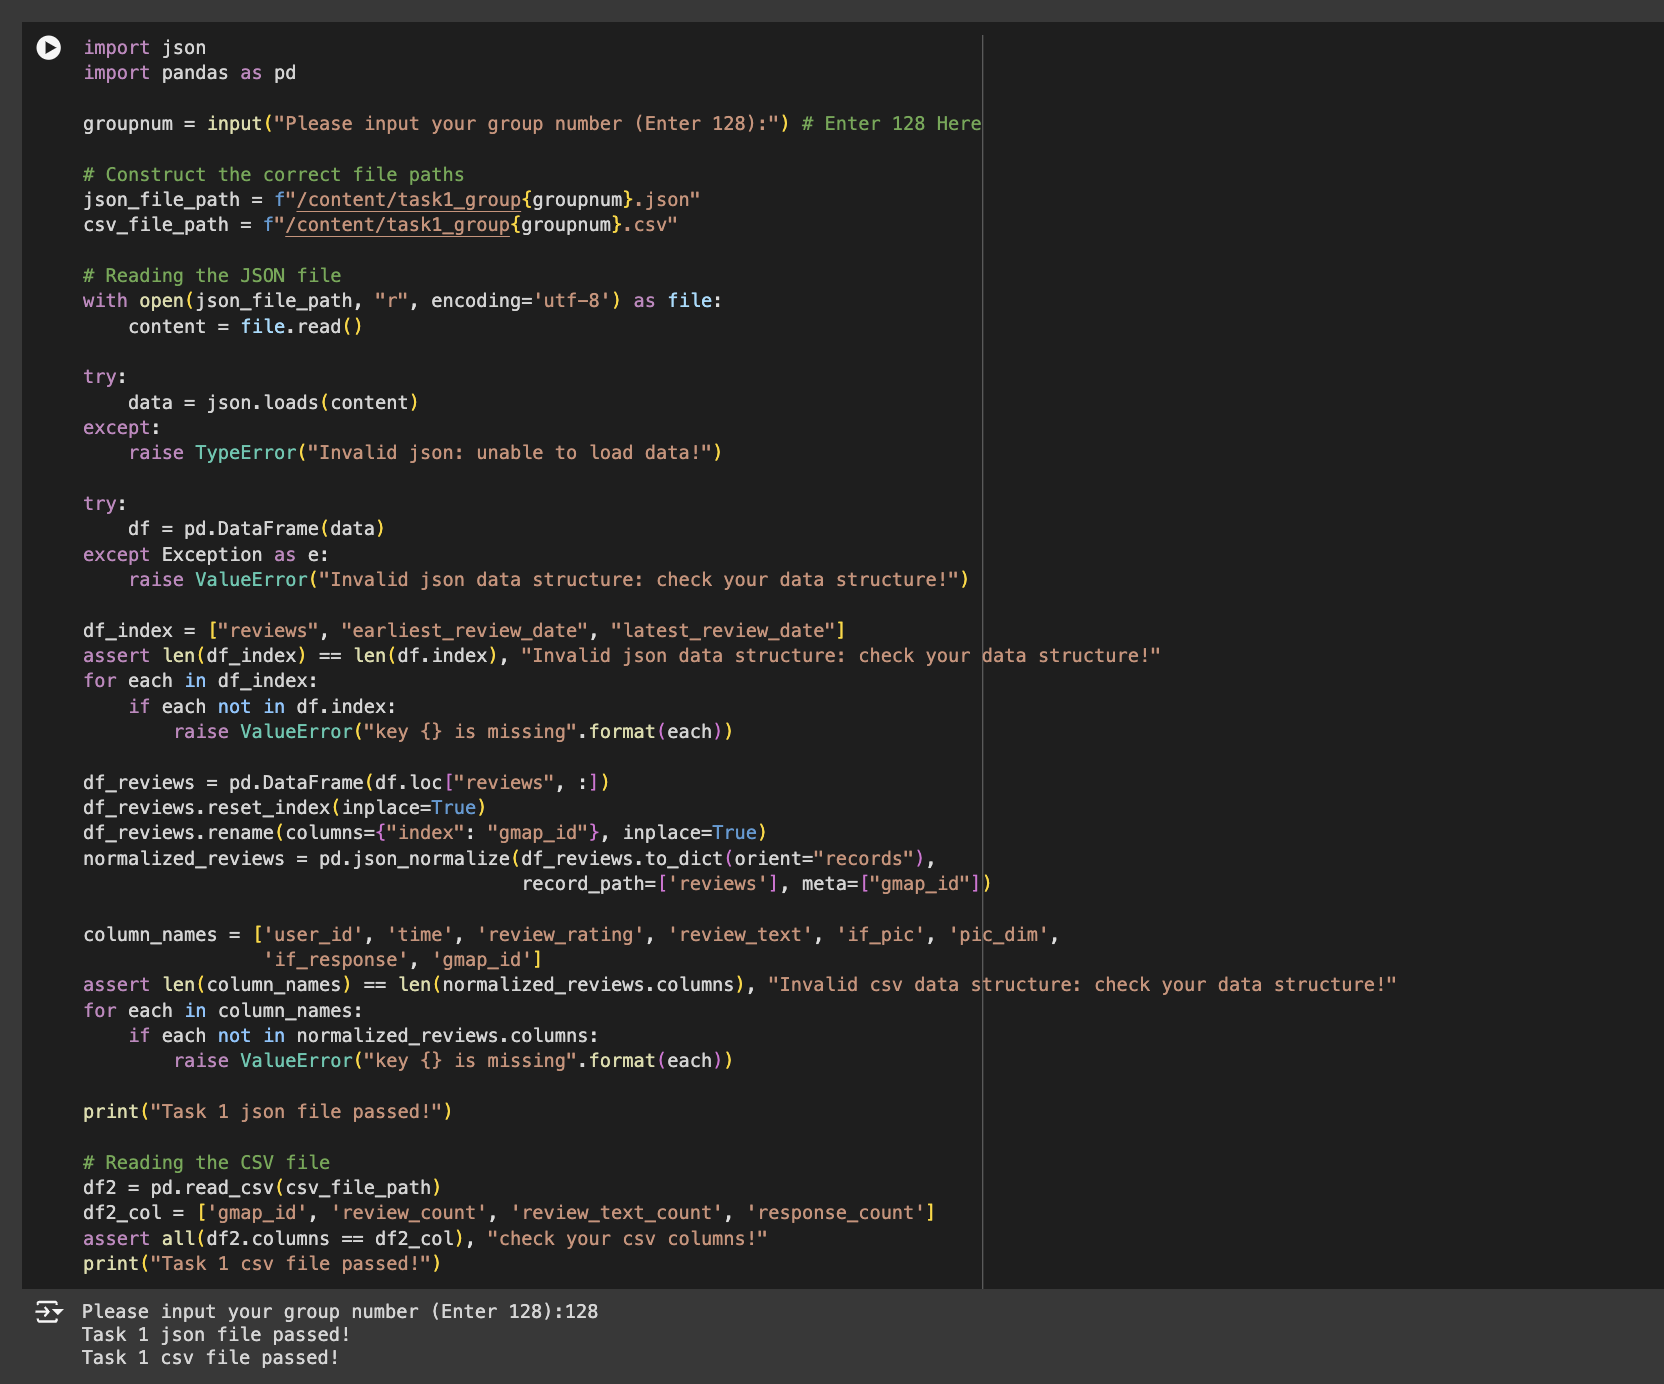

<div class="alert alert-block alert-warning">

## 1.7. Summary <a class="anchor" name="summary"></a>

</div>

Overall, task 1 talks about the processes and merging of review data from multiples sources such as text files and Excel files. This task mainly focuses on data cleaning such as emojis, reviewing timestamps as well as compiling the data into a structured format. After merging files, we can see that it can be identified the earliest review and latest review dates for each gmap_id. After all these steps these cleaned data will be converted into CSV as well as JSON files where key details are a number of reviews, the response and image dimensions that is associated with each review.

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.8. References <a class="anchor" name="Ref"></a>

</div>



- Why do I need to add DOTALL to python regular expression to match new line in raw string, https://stackoverflow.com/questions/22610247, Accessed 30/08/2022.


- W3Schools. (n.d.). Python JSON. W3Schools. Retrieved August 27, 2024, from https://www.w3schools.com/python/python_json.asp

- https://colab.research.google.com/drive/15ra-ekowBK0q8Knrx2juCfQRmG-qXZWy?authuser=2 - Applied class 1 - import google colab

- (n.d.). Regular Expression HOWTO. https://docs.python.org/3/howto/regex.html

- (n.d.). Json — JSON encoder and decoder. Python.org. https://docs.python.org/3/library/json.html


....
